In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

Using TensorFlow backend.


In [2]:
#env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


Holder Agent
--------------
To begin a holder agent will run on the month of march 2017, which will provide a reference to compare future agents. The same could also be done with a random agent. A holder agent is equivalent to set the action to 1 at each step (selling 100% of the portfolio's fiat).

In [3]:
date = datetime.datetime(2017, 5, 1, 0, 0)
env_trading.reset(date=date)
rewards = []
portfolio = []
while True:
    action = 1.0 #Holding
    s, r, done, _ = env_trading.step(action)
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break

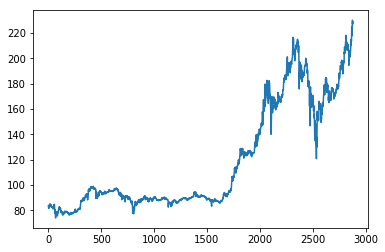

In [4]:
plt.plot(portfolio)
plt.show()

Stochastic Policy Gradient
-----------

In [5]:
agentSPG = agent.StochasticPolicyGradientAgent(env_trading, learning_rate = 1e-3, batch_size = 64, quiet = False) #Do not run this twice without reseting the Kernel!

In [6]:
#As a sanity check I try to overfit over the same step
#A profitable action in this case would be to buy (action=1)

date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
losses = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(5000):
    start = env_trading.reset(date=date)
    start = np.reshape(start,200)
    action = agentSPG.act([start])
    s, r, done, _ = env_trading.step(action)
    s = np.reshape(s,200)
    agentSPG.store_step(action, s, r)
    rewards.append(r)
    if i % 100 == 0:
        
        agentSPG.train()


Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: 0.8074569702148438
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -1.0
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -1.0
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.8846040964126587
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: 1.0
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.7418432235717773
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: 1.0
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.39834991097450256
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: 0.3314371109008789
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: 0.41992098093032837
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.9645050168037415
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.29658615589141846
Sigma: 1.0473365783691406, Mu: -0.4321019649505615, Action: -0.590863049030304
Sigma: 1.04733657836914

Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 0.293853223323822
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 0.8141061067581177
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 0.5250465273857117
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 0.9527601003646851
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: -0.12925869226455688
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 0.2398630976676941
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: -0.5303798317909241
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.2674063444137573, Mu: 0.9896383881568909, Action: 1.0
Sigma: 1.26

KeyboardInterrupt: 

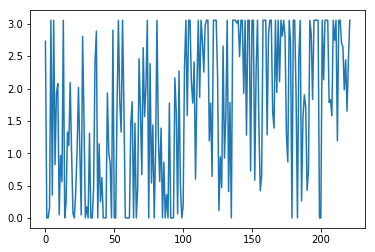

In [7]:
#Mu tends to 1 and sigma to zero as expected
plt.plot(rewards)
plt.show()

In [8]:
agentDQN = agent.DQNAgent(env_trading)

In [9]:
date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
losses = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(10000):
    start = env_trading.reset(date=date)
    start = np.reshape(start,[1,200])
    action = agentDQN.act(start, i)
    next_state, reward, done, _ = env_trading.step(action - 1) #Converting class to action
    next_state = np.reshape(next_state, [1, 200])

    agentDQN.store_step(start, action, reward, next_state, done)
    
    state = next_state
    rewards.append(reward)
    if i % 100:
        agentDQN.train()

ValueError: Error when checking : expected dense_1_input to have shape (None, 100) but got array with shape (1, 200)

In [ ]:
plt.plot(rewards)
plt.show()